In [3]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [31]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()

In [32]:
print(type(X_train),X_train.shape,X_test.shape)
print(y_train.shape,y_train[0])

<class 'numpy.ndarray'> (60000, 28, 28) (10000, 28, 28)
(60000,) 5


Text(0, 0.5, '9')

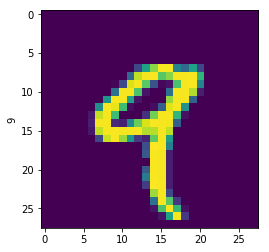

In [33]:
'''
check image
'''
plt.figure()
plt.imshow(X_train[4])
plt.ylabel(y_train[4])


In [34]:
'''
preprocess
'''
num_train,w,h = X_train.shape
im_size_flat = w * h
X_train = X_train.reshape(-1,im_size_flat)
X_test = X_test.reshape(-1,im_size_flat)
num_class = 10
y_train = tf.one_hot(y_train,num_class)
y_test = tf.one_hot(y_test,num_class)
print(y_train[0])

Tensor("strided_slice_2:0", shape=(10,), dtype=float32)


In [36]:
x = tf.placeholder(tf.float32,[None,im_size_flat])
y = tf.placeholder(tf.float32,[None,num_class])

In [41]:
weight = tf.Variable(tf.zeros([im_size_flat,num_class]))
bias = tf.Variable(tf.zeros([num_class]))

In [47]:
logits = tf.add(tf.matmul(x,weight) , bias)

In [48]:
y_pred = tf.nn.softmax(logits)
y_pred = tf.argmax(y_pred,axis=1)

In [51]:
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y)

In [52]:
cost = tf.reduce_mean(loss)

In [53]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.05).minimize(cost)